# Explore here
### Regresion Logistica
#### Banking Marketing Campaign

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

#### Step 1: Loading the dataset

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv" , sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Step 2: Perform a full EDA

In [2]:
# Dataset shape:

total_data.shape

(41188, 21)

The dataset has 41,188 records and 21 columns (variables).

In [3]:
# Dataset info: in Dtype column we see the variable type, if it is categorical or numeric.

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Separate in 2 lists the numeric and categorical variables:

object_variables = total_data.select_dtypes(include=['object']).columns.tolist()
numeric_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", object_variables)
print("Numeric variables:", numeric_variables)

Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numeric variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [5]:
# Null Dataframe:

total_data.isnull().sum().sort_values(ascending = False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

El dataset no presenta valores nulos.

Check duplicated records: We cannot check if there are duplicated information because we do not know the ID for each client and all the columns have records that could be repited for more than one person.

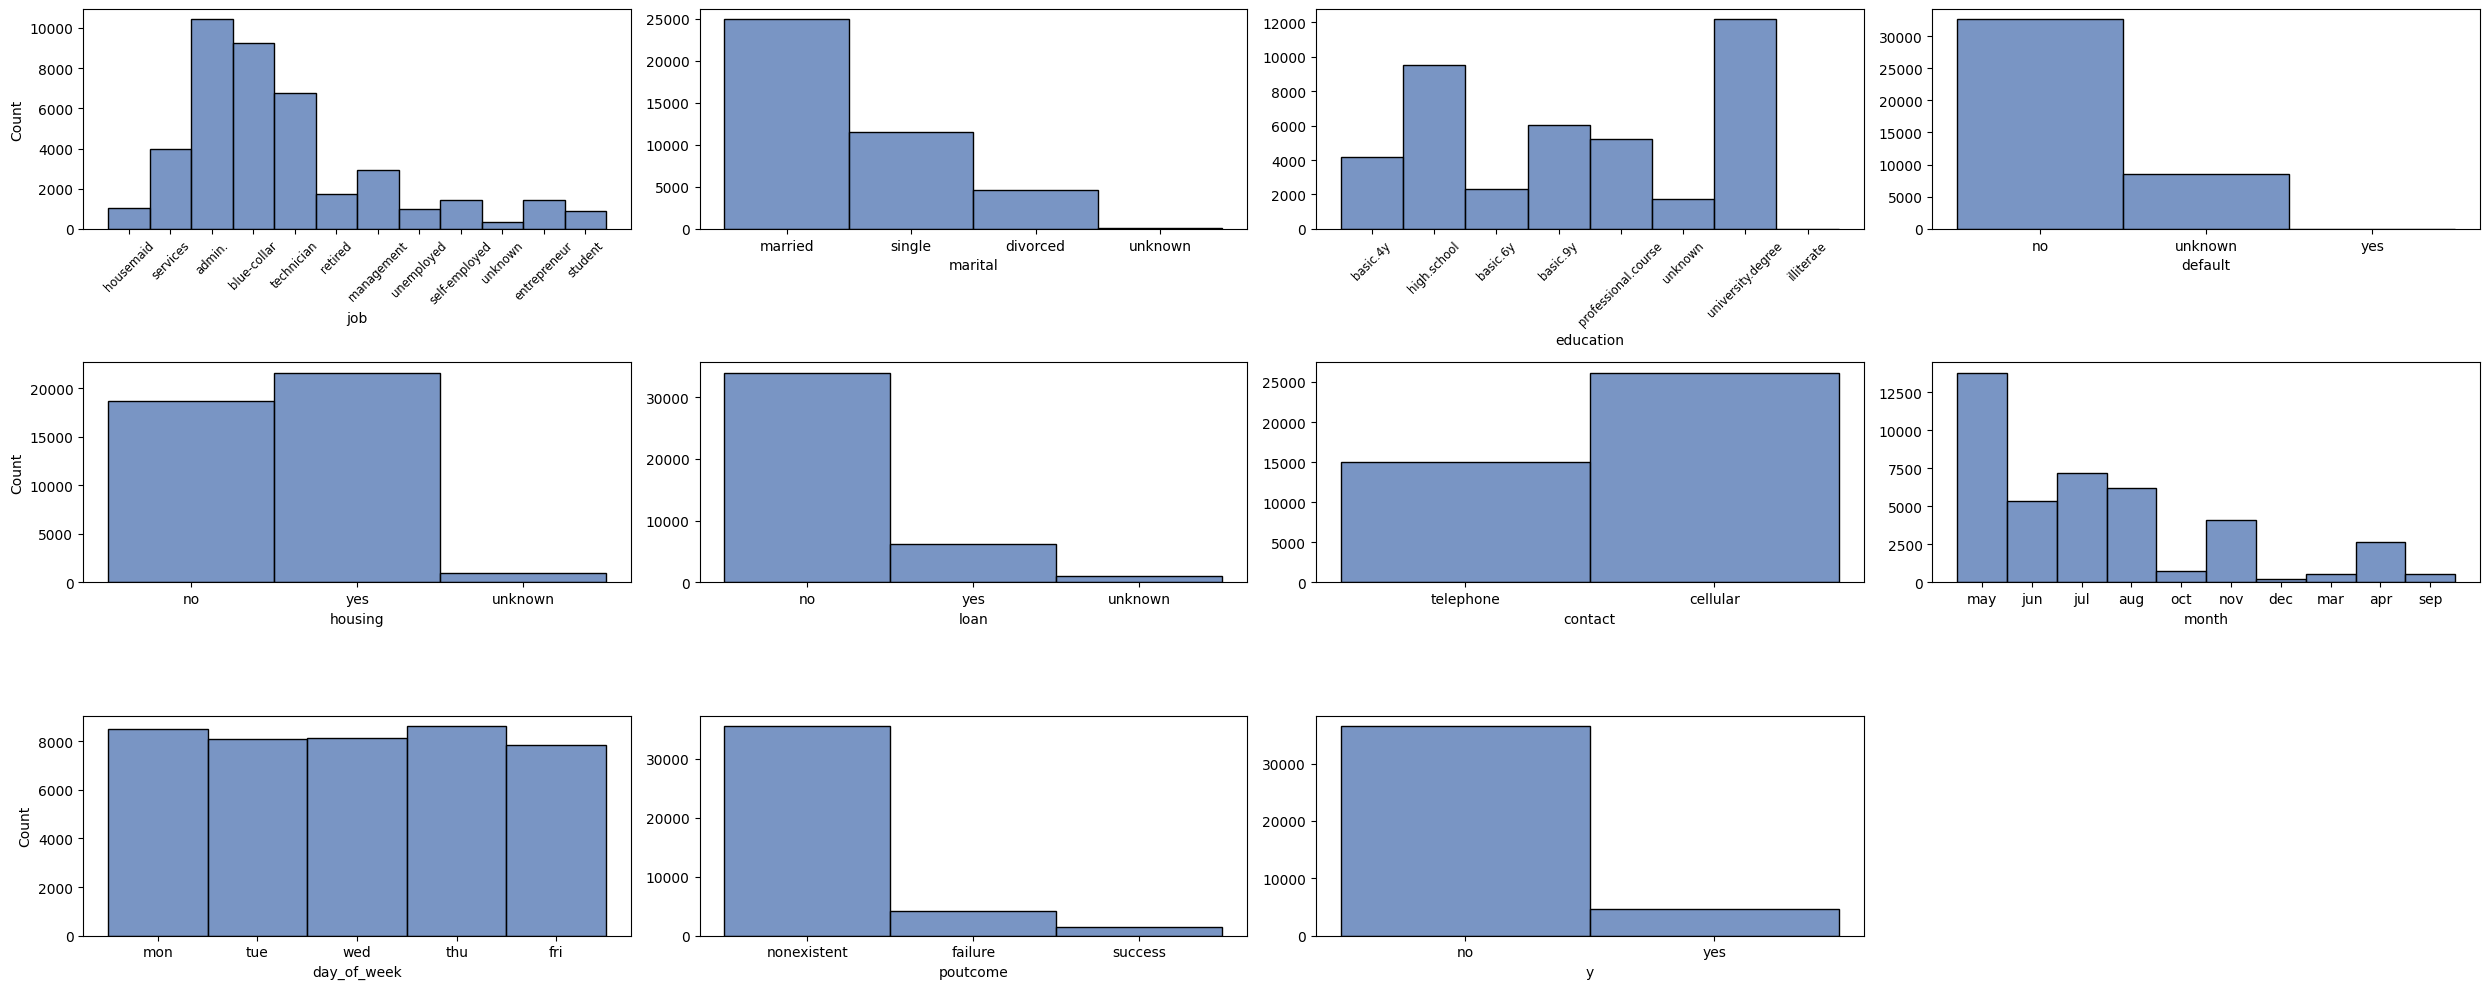

In [6]:
# Univariate Analysis:
# Histograms for categorical variables.
# Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_palette("deep")

fig, axes = plt.subplots(3, 4, figsize=(25, 10))

sns.histplot(ax=axes[0,0], data = total_data, x='job')
axes[0,0].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0,1], data = total_data, x='marital').set(ylabel = None)
sns.histplot(ax=axes[0,2], data = total_data, x='education').set(ylabel = None)
axes[0,2].tick_params(axis='x', rotation=45, labelsize='small')
sns.histplot(ax=axes[0,3], data = total_data, x='default').set(ylabel = None)

sns.histplot(ax=axes[1,0], data = total_data, x='housing')
sns.histplot(ax=axes[1,1], data = total_data, x='loan').set(ylabel = None)
sns.histplot(ax=axes[1,2], data = total_data, x='contact').set(ylabel = None)
sns.histplot(ax=axes[1,3], data = total_data, x='month').set(ylabel = None)

sns.histplot(ax=axes[2,0], data = total_data, x='day_of_week')
sns.histplot(ax=axes[2,1], data = total_data, x='poutcome').set(ylabel = None)
sns.histplot(ax=axes[2,2], data = total_data, x='y').set(ylabel = None)
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



In [7]:
# Groups inside Job category:
job_types = total_data['job'].value_counts()
percent_jobs = (job_types / len(total_data['job'])).round(3) * 100
print(percent_jobs)

job
admin.           25.3
blue-collar      22.5
technician       16.4
services          9.6
management        7.1
retired           4.2
entrepreneur      3.5
self-employed     3.5
housemaid         2.6
unemployed        2.5
student           2.1
unknown           0.8
Name: count, dtype: float64


In [8]:
# Groups inside Marital category:
marital_types = total_data['marital'].value_counts()
percent_marital = (marital_types / len(total_data['marital'])).round(3) * 100
print(percent_marital)

marital
married     60.5
single      28.1
divorced    11.2
unknown      0.2
Name: count, dtype: float64


In [9]:
# Groups inside Education category:
education_types = total_data['education'].value_counts()
percent_education = (education_types / len(total_data['education'])).round(3) * 100
print(percent_education)

education
university.degree      29.5
high.school            23.1
basic.9y               14.7
professional.course    12.7
basic.4y               10.1
basic.6y                5.6
unknown                 4.2
illiterate              0.0
Name: count, dtype: float64


In [10]:
# Groups inside Default category:
default_types = total_data['default'].value_counts()
percent_default = (default_types / len(total_data['default'])).round(3) * 100
print(percent_default)

default
no         79.1
unknown    20.9
yes         0.0
Name: count, dtype: float64


In [11]:
# Groups inside Loan category:
loan_types = total_data['loan'].value_counts()
percent_loan = (loan_types / len(total_data['loan'])).round(3) * 100
print(percent_loan)

loan
no         82.4
yes        15.2
unknown     2.4
Name: count, dtype: float64


First Conclusions:
- The most popular job are: admin (25.3%), blue-collar (22.5%) and technician (16.4%).
- A 60.5% of the clients are married, 28.1% are single and 11.2% are divorced.
- People with university degree and high school together account for 52.6% of the total.
- 79.1% and 82.4% of the clients do not possess credit and personal loan respectively.
- The marjority of the clients have housing loans.
- The marjority of the clients reject the marketing campaign.
- Between May and August there was a higher volume of contacts.
- Everyday a similar number of calls is done.
- The marjority of the clients reject the long-term deposit.

Observations: some variables do not give us any information and we will remove their respective columns.
- day_of_week , education.


In [12]:
total_data.drop(["day_of_week", "education"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


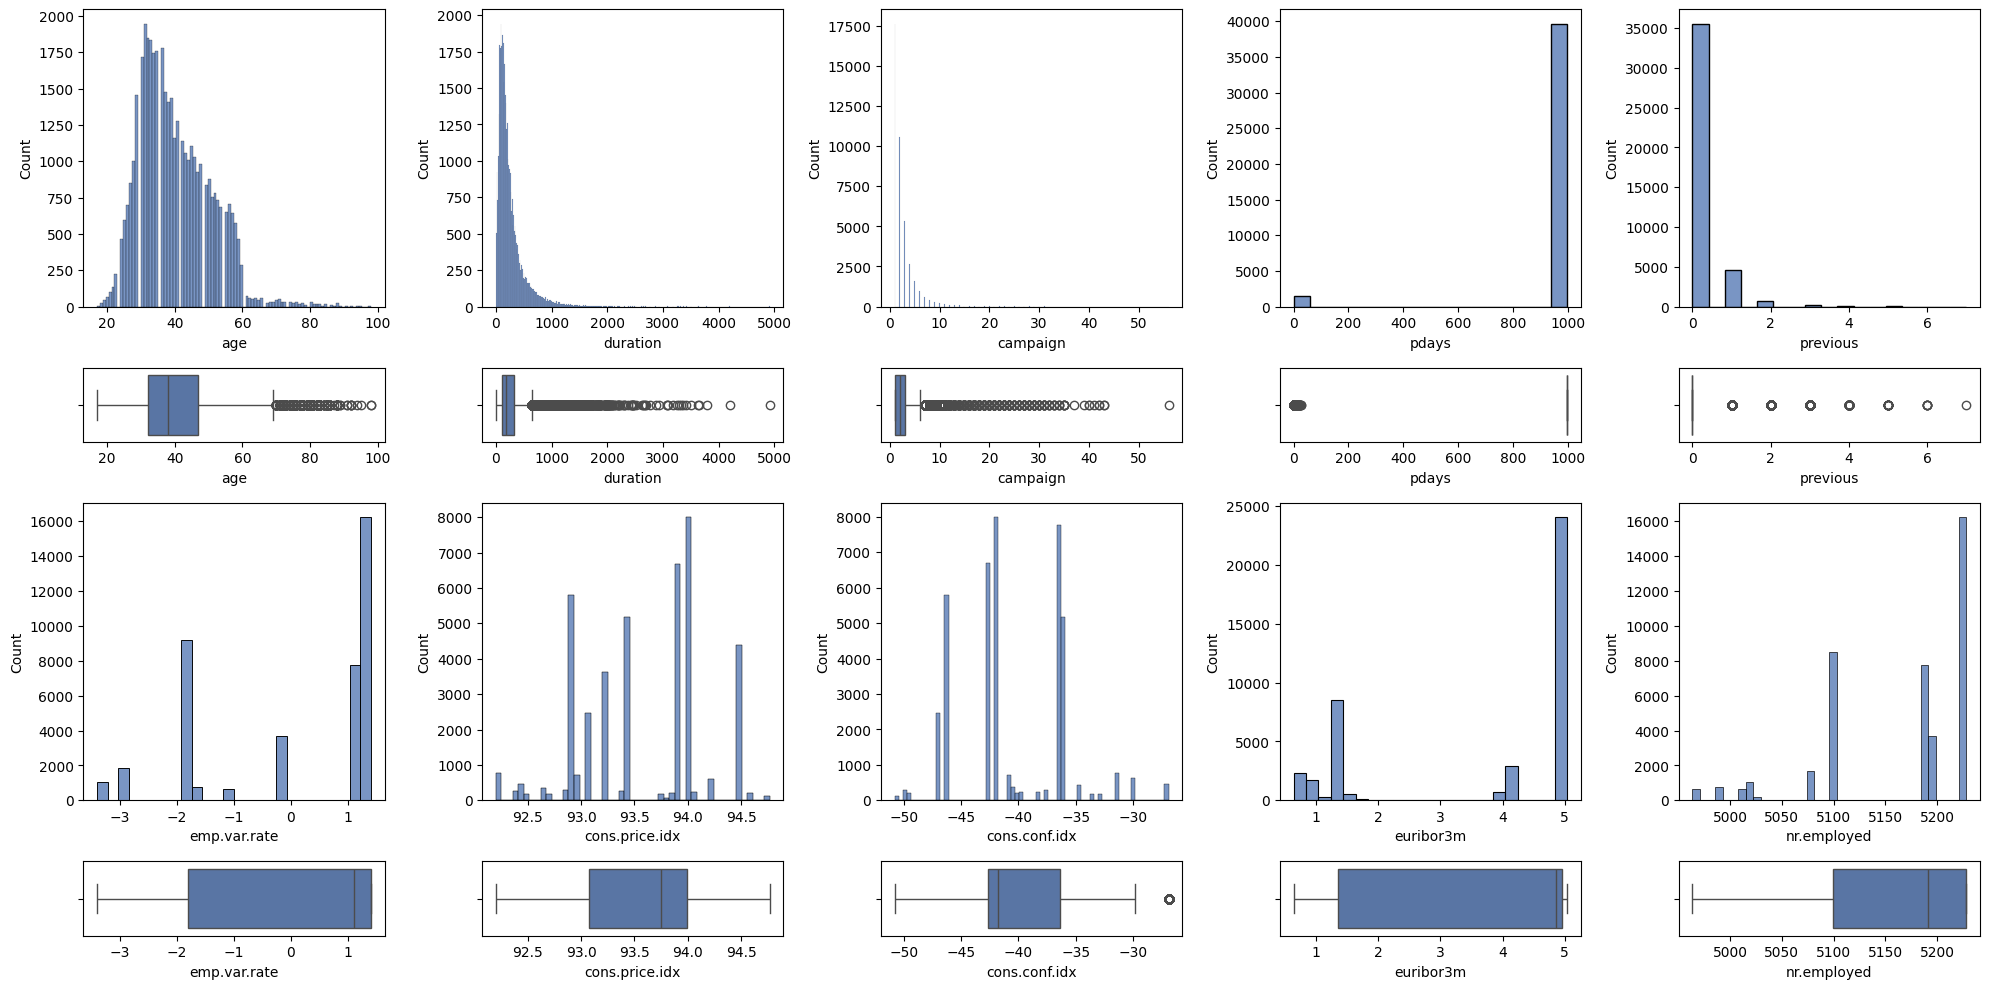

In [13]:
# Univariate Analysis:
# Histograms and boxplot for numeric variables.
# Numeric variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 5, figsize = (20, 10), gridspec_kw = {"height_ratios": [16, 4, 16, 4]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "duration")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "duration")

sns.histplot(ax = axis[0, 2], data = total_data, x = "campaign")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "campaign")

sns.histplot(ax = axis[0, 3], data = total_data, x = "pdays")
sns.boxplot(ax = axis[1, 3], data = total_data, x = "pdays")

sns.histplot(ax = axis[0, 4], data = total_data, x = "previous")
sns.boxplot(ax = axis[1, 4], data = total_data, x = "previous")

sns.histplot(ax = axis[2, 0], data = total_data, x = "emp.var.rate")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "emp.var.rate")

sns.histplot(ax = axis[2, 1], data = total_data, x = "cons.price.idx")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "cons.price.idx")

sns.histplot(ax = axis[2, 2], data = total_data, x = "cons.conf.idx")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "cons.conf.idx")

sns.histplot(ax = axis[2, 3], data = total_data, x = "euribor3m")
sns.boxplot(ax = axis[3, 3], data = total_data, x = "euribor3m")

sns.histplot(ax = axis[2, 4], data = total_data, x = "nr.employed")
sns.boxplot(ax = axis[3, 4], data = total_data, x = "nr.employed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Groups inside Age category:
age_types = total_data['nr.employed'].value_counts()
percent_age = (age_types / len(total_data['nr.employed'])).round(3).sort_values(ascending = False) * 100
print(percent_age.head(100))

nr.employed
5228.1    39.4
5099.1    20.7
5191.0    18.8
5195.8     8.9
5076.2     4.0
5017.5     2.6
4991.6     1.9
5008.7     1.6
4963.6     1.5
5023.5     0.4
5176.3     0.0
Name: count, dtype: float64


Conclusions for numeric analysis:
- age: 31 - 50 years old
- duration: 0 - 250 seconds
- campaign: 1 - 5 contacts
- pdays: 999 days
- previous: 86.3% no, 11.1% once.
- emp.var.rate: 39.4% for 1.4, 22.3% for -1.8 and 18.8% for 1.1.
- cons.conf.idx: 93.994 18.8 / 93.918-16.2 / 92.893-14.1 / 93.444-12.6 / 94.465--10.6
- euribor3m: 5
- nr.employed: 5100 - 5200

<Axes: xlabel='y', ylabel='count'>

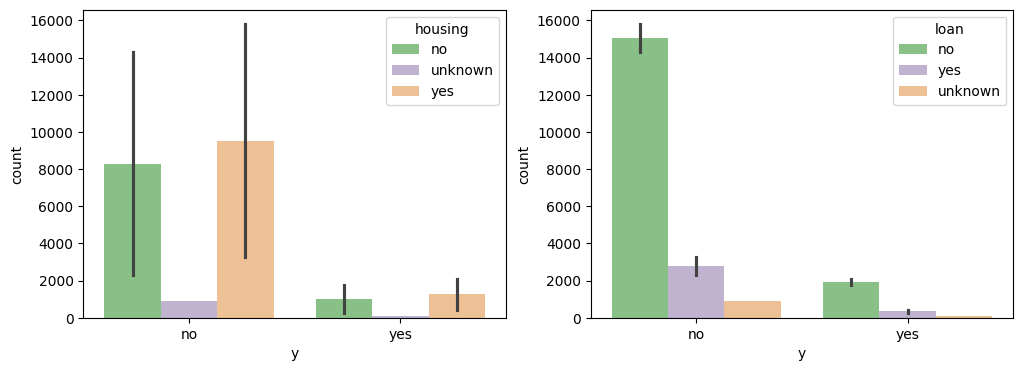

In [15]:
# Multivariate Analysis
# Categorical-Categorical Analysis: we will compare some of the categorical variables with our target variable: y
# Selected Categorical variables: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'y']

agg_total_data = total_data.groupby(['y', 'housing', 'loan']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='y', y='count', hue='housing', data=agg_total_data, palette='Accent',ax=axes[0],)
sns.barplot(x='y', y='count', hue='loan', data=agg_total_data, palette='Accent',ax=axes[1])

- The marjority of clients that already have a housing loan or a personal loan reject the long-term deposit (y).

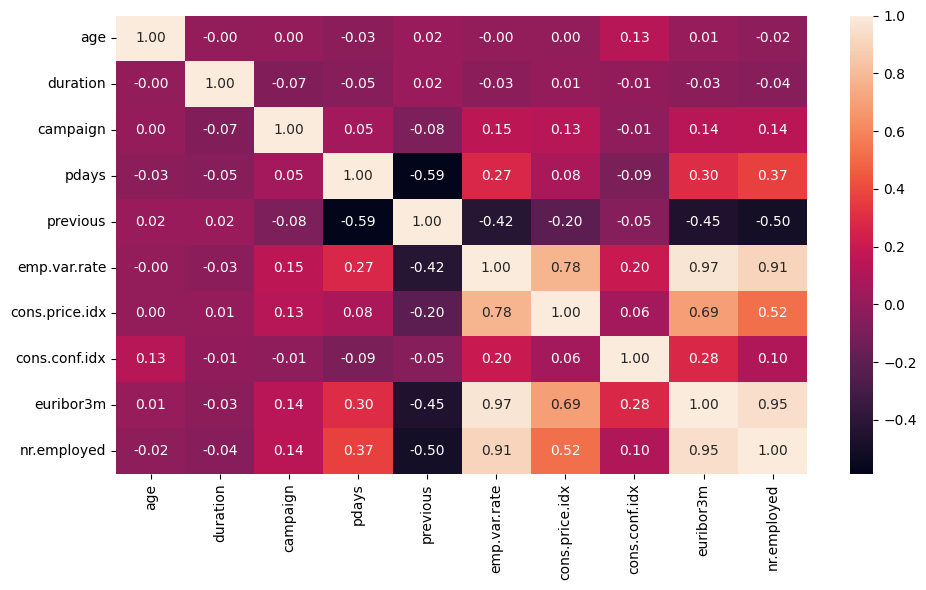

In [16]:
# Multivariate Analysis
# Numeric-Numeric Analysis
# Selected Categorical variables: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'y']

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[numeric_variables].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

In [17]:
# We will copy the dataset to factorize the categorical variables in a new one:

fact_data = total_data.copy()
fact_data.head()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


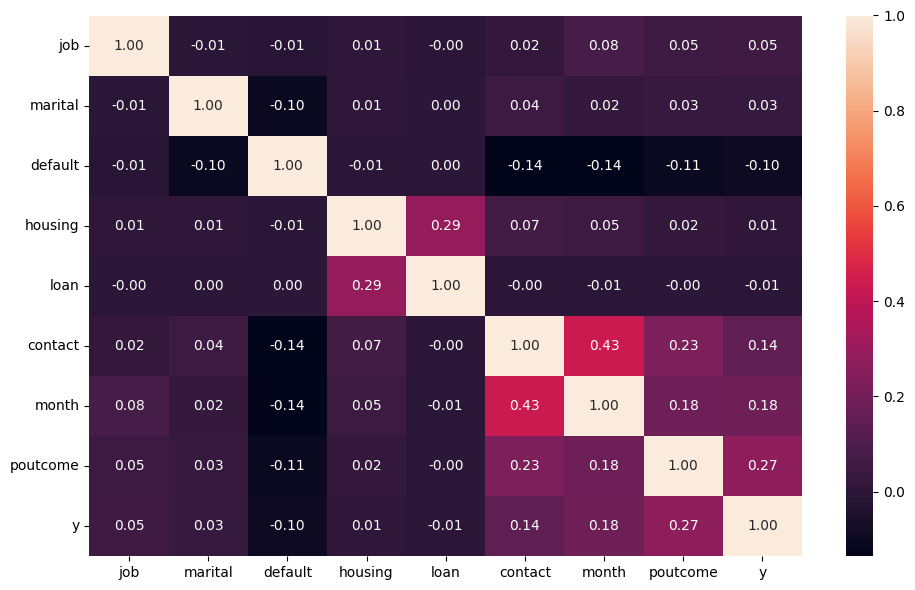

In [18]:
fact_data["job"] = pd.factorize(fact_data["job"])[0]
fact_data["marital"] = pd.factorize(fact_data["marital"])[0]
fact_data["default"] = pd.factorize(fact_data["default"])[0]
fact_data["housing"] = pd.factorize(fact_data["housing"])[0]
fact_data["loan"] = pd.factorize(fact_data["loan"])[0]
fact_data["contact"] = pd.factorize(fact_data["contact"])[0]
fact_data["month"] = pd.factorize(fact_data["month"])[0]
fact_data["poutcome"] = pd.factorize(fact_data["poutcome"])[0]
fact_data["y"] = pd.factorize(fact_data["y"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(fact_data[["job", "marital", "default", "housing", "loan", "contact", "month", "poutcome" , "y"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Relevant relationship between:
- contact-month: 0.43.
- loan-housing: 0.29.
- poutcome-Y: 0.27.

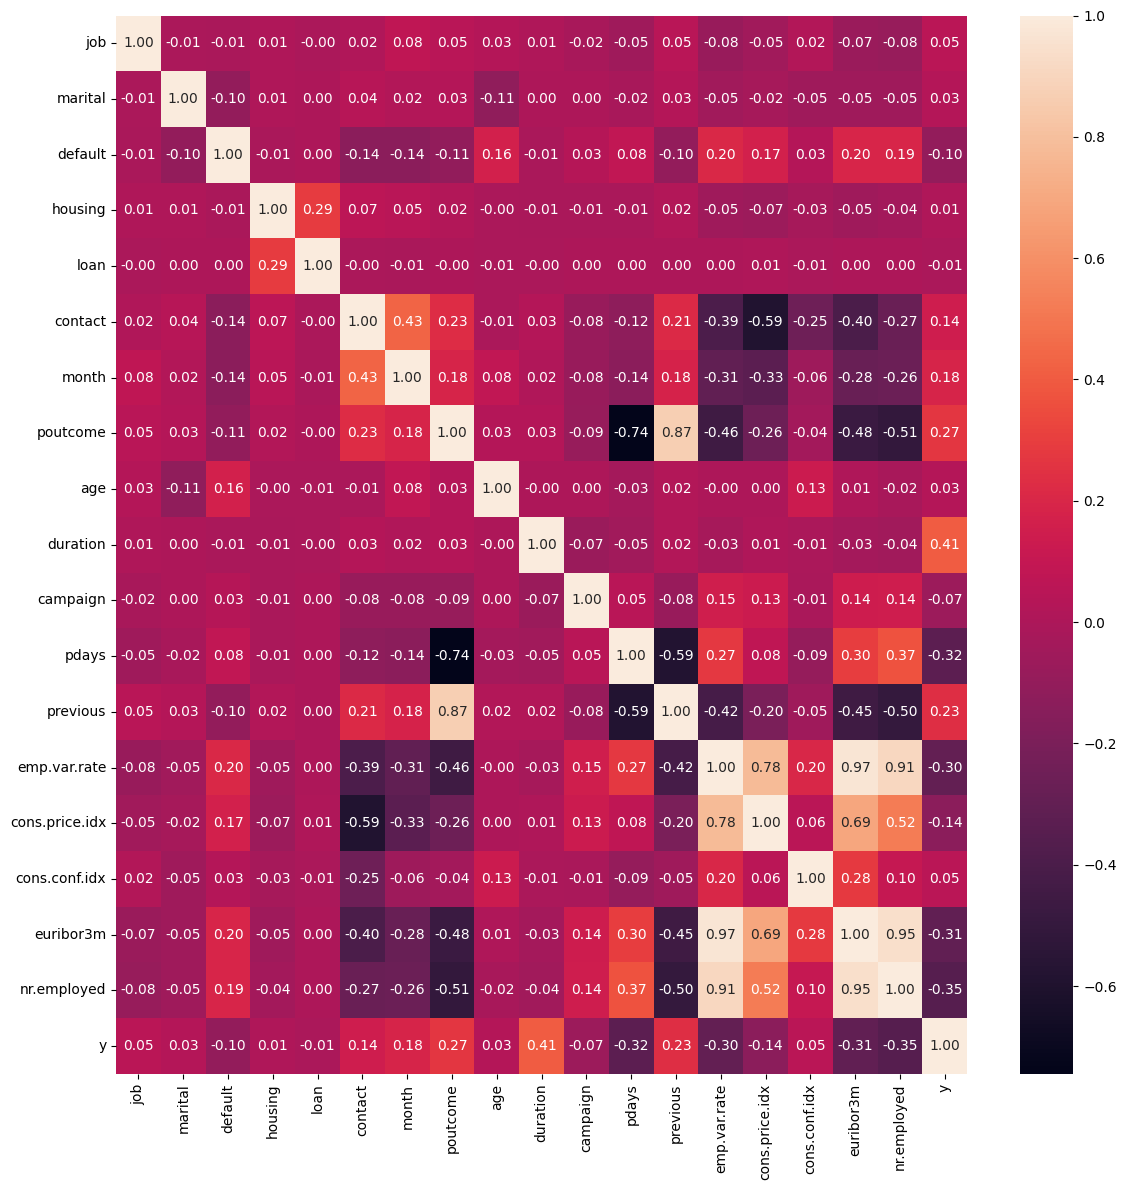

In [19]:
# Complete correlation Heatmap:

fig, axis = plt.subplots(figsize = (12, 12))

sns.heatmap(fact_data[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome',  'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Important nonclusions:

- Consumer Price Index, Euribor, Number of Employed People and Consumer Confidence all have tight correlations, as expected.
- The duration of the calls have a nice correlation with our target y, the success of the customer taking long-term deposit.

### Feature Engineering

In [20]:
# Outlier Analysis:

fact_data.describe()

,age,job,marital,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.673691,0.510634,0.208872,0.571914,0.199767,0.634748,2.250097,258.285010,2.567593,962.475454,0.172963,0.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.454116,0.696779,0.406686,0.541209,0.456002,0.481507,2.429079,259.279249,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


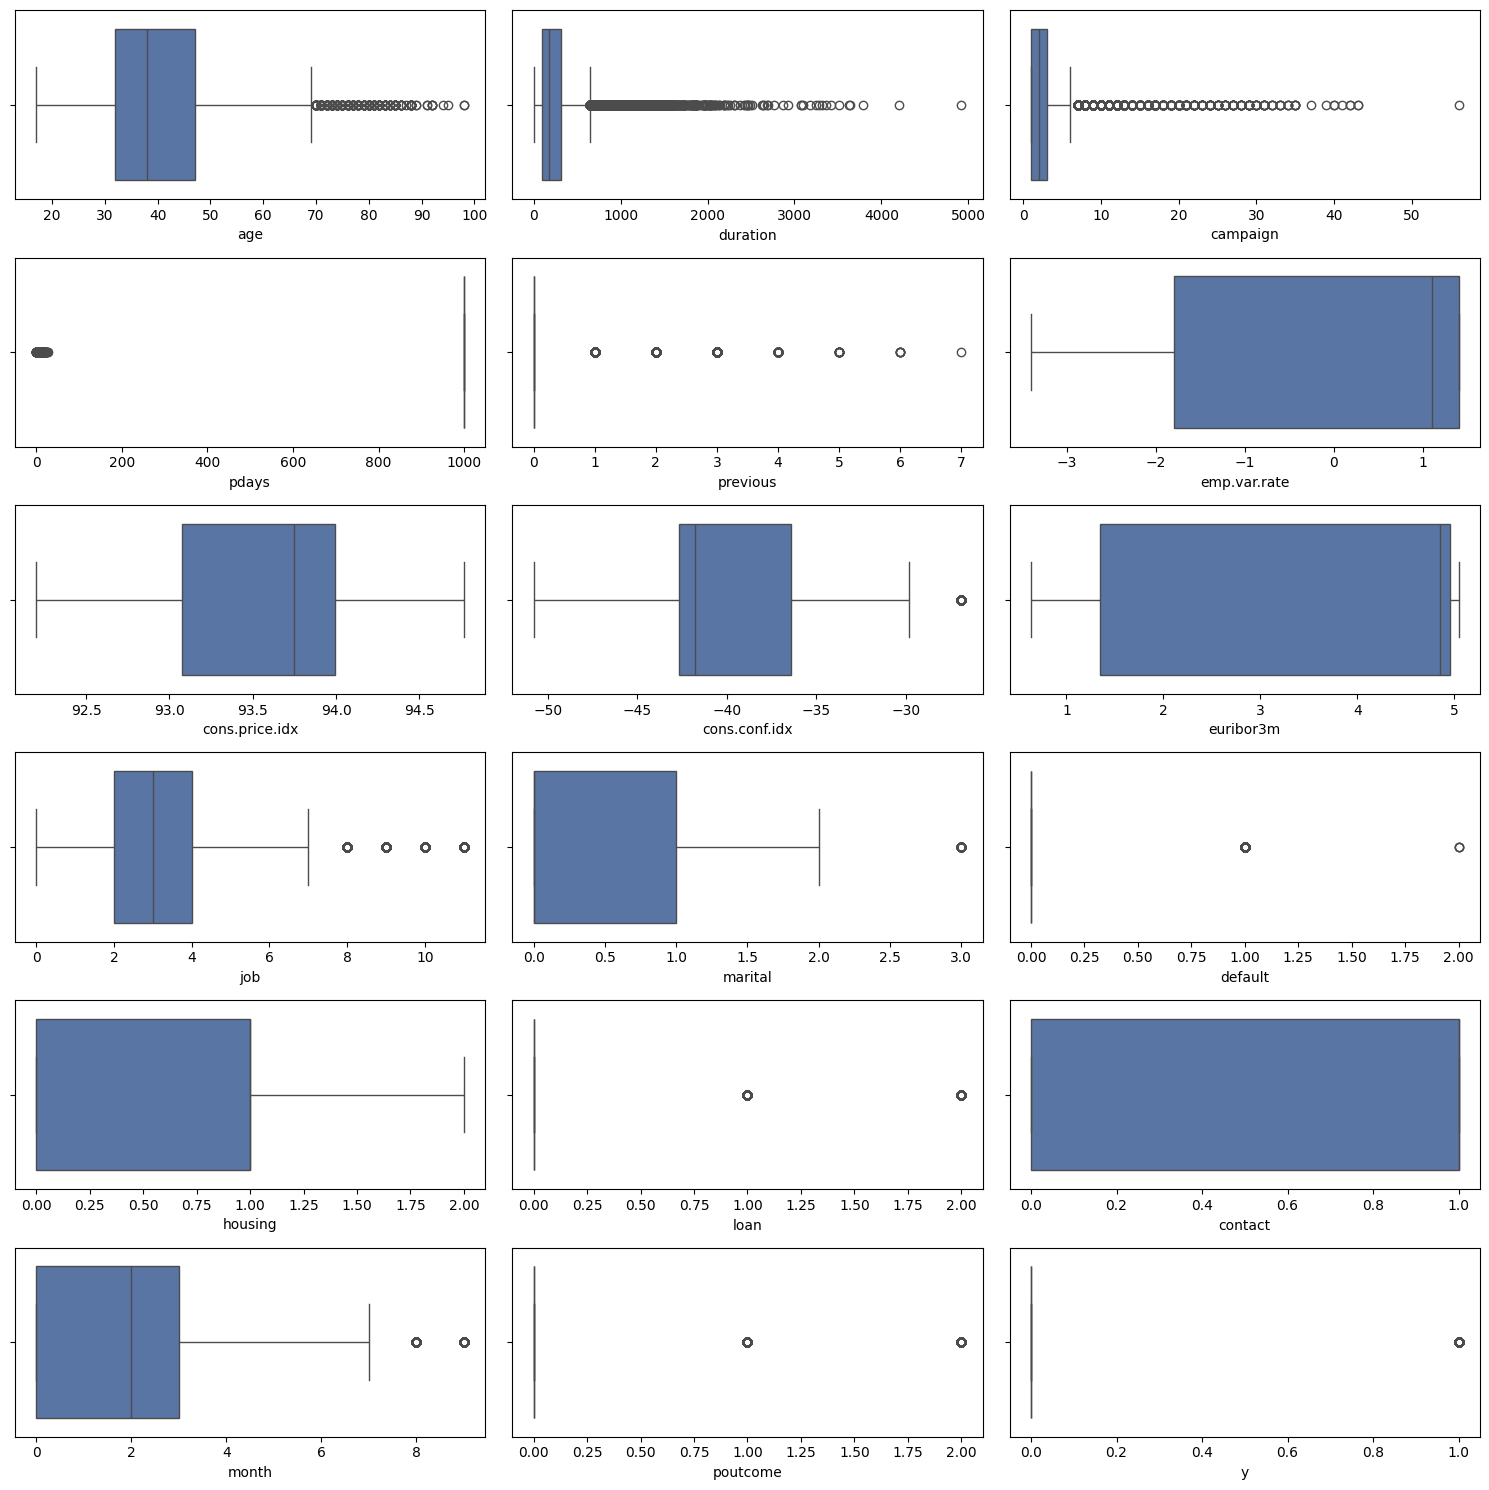

In [21]:
# Boxplots to Observe Outliers 

fig, axis = plt.subplots(6, 3, figsize=(15,15))

sns.boxplot(ax=axis[0,0], data=fact_data, x = 'age')
sns.boxplot(ax=axis[0,1], data=fact_data, x = 'duration')
sns.boxplot(ax=axis[0,2], data=fact_data, x = 'campaign')
sns.boxplot(ax=axis[1,0], data=fact_data, x = 'pdays')
sns.boxplot(ax=axis[1,1], data=fact_data, x = 'previous')
sns.boxplot(ax=axis[1,2], data=fact_data, x = 'emp.var.rate')
sns.boxplot(ax=axis[2,0], data=fact_data, x = 'cons.price.idx')
sns.boxplot(ax=axis[2,1], data=fact_data, x = 'cons.conf.idx')
sns.boxplot(ax=axis[2,2], data=fact_data, x = 'euribor3m')
sns.boxplot(ax=axis[3,0], data=fact_data, x = 'job')
sns.boxplot(ax=axis[3,1], data=fact_data, x = 'marital')
sns.boxplot(ax=axis[3,2], data=fact_data, x = 'default')
sns.boxplot(ax=axis[4,0], data=fact_data, x = 'housing')
sns.boxplot(ax=axis[4,1], data=fact_data, x = 'loan')
sns.boxplot(ax=axis[4,2], data=fact_data, x = 'contact')
sns.boxplot(ax=axis[5,0], data=fact_data, x = 'month')
sns.boxplot(ax=axis[5,1], data=fact_data, x='poutcome')
sns.boxplot(ax=axis[5,2], data=fact_data, x = 'y')

plt.tight_layout()

plt.show()

We can see that some variables have outliers: age, duration, campaign, previous, consumer confidence, job, marital, loan, month, Y Target.

Let's analyze if those Outliers should be kept, deleted or replaced.

In [22]:
# Age Analysis

age_stats = total_data['age'].describe()
print(age_stats)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [23]:
# Age IQR

age_iqr = age_stats['75%'] - age_stats['25%']
upper_limit = age_stats['75%'] + 1.5 * age_iqr
lower_limit = age_stats['25%'] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 69.5 and 9.5, with an interquartile range of 15.0


Despite showing that above 69.5 it's consider an Outlier, since Age for a Long Term Deposit is not an issue as a loan, we will keep Age with outliers.

In [24]:
# Duration Analysis

duration_stats = total_data['duration'].describe()
print(duration_stats)

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [25]:
# Duration IQR

duration_iqr = duration_stats['75%'] - duration_stats['25%']
upper_limit = duration_stats['75%'] + 1.5 * duration_iqr
lower_limit = duration_stats['25%'] - 1.5 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


4918 seconds (1 h 36 min) can perfectly happen in a call if the agent is succeeding and selling a product to costumer. Keeping the outliers here is important as well, as call duration can let us understand many patterns about success or failure.

In [26]:
# Campaign Analysis

campaign_stats = total_data['campaign'].describe()
print(campaign_stats)

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [27]:
# Campaign IQR

campaign_iqr = campaign_stats['75%'] - campaign_stats['25%']
upper_limit = campaign_stats['75%'] + 1.5 * campaign_iqr
lower_limit = campaign_stats['25%'] - 1.5 * campaign_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

The upper and lower limits for finding outliers are 6.0 and -2.0, with an interquartile range of 2.0


In [28]:
# Trimm the Outliers 

total_data = total_data[total_data["campaign"] <= 15]

Above 15 effective calls seems quite an odd number of contacts to a customer in a year.

In [29]:
# Null Analysis:

# Count the Nulls

total_data.isnull().sum().sort_values(ascending=False)

age               0
pdays             0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
campaign          0
job               0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
marital           0
y                 0
dtype: int64

### Feature Scalling

In [30]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' , 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(fact_data[num_variables])
fact_data_scal = pd.DataFrame(scal_features, index = fact_data.index, columns = num_variables)
fact_data_scal.head()

,job,marital,default,housing,loan,contact,month,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


### Feature Selection

In [31]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = fact_data_scal.drop('y', axis = 1)
y = fact_data_scal['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KBest Selection for the best Features
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,1.000000,0.980730,1.000000
1,0.0,0.000000,0.333333,0.138291,0.512287
2,0.5,0.142857,0.333333,0.163228,0.512287
3,0.0,0.000000,1.000000,0.980957,1.000000
4,0.0,0.000000,0.937500,0.958059,0.859735


In [32]:
X_train_sel['y'] = list(y_train)
X_test_sel['y'] = list(y_test)
X_train_sel.to_csv('/workspaces/machine-learning-regresion-logistica-Juli-MM/data/processed/clean_train-bankmkt.csv', index=False)
X_test_sel.to_csv('/workspaces/machine-learning-regresion-logistica-Juli-MM/data/processed/clean_test-bankmkt.csv', index=False)

#### Step 3: Build a Logistic Regression Model

In [33]:
# Import cleanned data:

train_data = pd.read_csv('/workspaces/machine-learning-regresion-logistica-Juli-MM/data/processed/clean_train-bankmkt.csv')
test_data = pd.read_csv('/workspaces/machine-learning-regresion-logistica-Juli-MM/data/processed/clean_test-bankmkt.csv')

train_data.head()

,poutcome,previous,emp.var.rate,euribor3m,nr.employed,y
0,0.0,0.000000,1.000000,0.980730,1.000000,0.0
1,0.0,0.000000,0.333333,0.138291,0.512287,0.0
2,0.5,0.142857,0.333333,0.163228,0.512287,0.0
3,0.0,0.000000,1.000000,0.980957,1.000000,0.0
4,0.0,0.000000,0.937500,0.958059,0.859735,0.0


In [34]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

#### Initiate Model Training (Logistic Regression)

We have selected Logistic Regression because we want to take a decision: Contract a long-term deposit or not.

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Model prediction:

y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
# Accuracy Test

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8936635105608157

- Accuracy: 0.8936635105608157

- In addition to the observed model score, it is common in classification problems to construct a confusion matrix, which is a table that is organized such that each row of the matrix represents instances of a predicted class, while each column represents instances of an actual class.

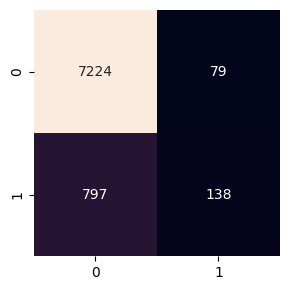

In [38]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

bankmkt_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual

cm_df = pd.DataFrame(bankmkt_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()


Conclusions:

- True negative (TN): Corresponds to the number 7224 and are the cases where the model predicted negative (reject long-term deposit) and the actual class is also negative.
- False negative (FN): Corresponds to the number 797 and are the cases where the model predicted negative, but the actual class is positive.
- True positive (TP): corresponds to the number 138 and are the cases where the model predicted positive (contract long-term deposit) and the actual class is also positive.
- False positive (FP): Corresponds to the number 79 and are the cases in which the model predicted positive, but the actual class is negative.

#### Step 4: Optimize the previous model

#### Hyperparameter Optimization

- Actually: 0.8936635105608157

In [39]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand:

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    }

# We initialize the grid

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [40]:
# Launch Results

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: U

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


Result: Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [41]:
# Model Run with new Parameters

model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8954843408594318

- With new parameters the accuracy increases to 0.8954843408594318. 
- The increase was of 0.2% which is not significant. Let's try with other Optimization Method: Random Search Optimization.

#### Random Search Optimization

In [42]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust

hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [43]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: U

Best hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 0.08858667904100823}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_me

Result: Best hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 0.08858667904100823}

In [45]:
# # Retrain the Model with new Parameters

model_grid = LogisticRegression(penalty = "l2", C = 0.08858667904100823, solver = "sag")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8954843408594318

Conclusion:

- No hyperparameters: 0.8936635105608157
- The best parameter: 0.8954843408594318
- Random hyperparameters: 0.8954843408594318

The best parameter and Random hyperparameters coincide.

- age. Age of customer (numeric)
- job. Type of job (categorical)
- marital. Marital status (categorical)
- education. Level of education (categorical)
- default. do you currently have credit (categorical) 
- housing. do you have a housing loan (categorical)
- loan. Do you have a personal loan? (categorical)
- contact. Type of contact communication (categorical)
- month. Last month in which you have been contacted (categorical)
- day_of_week. Last day on which you have been contacted (categorical)
- duration. Duration of previous contact in seconds (numeric)
- campaign. Number of contacts made during this campaign to the customer (numeric)
- pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
- previous. Number of contacts made during the previous campaign to the customer (numeric)
- poutcome. Result of the previous marketing campaign (categorical).
- emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
- cons.price.idx. Consumer price index. Monthly indicator (numeric)
- cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
- euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
- nr.employed. Number of employees. Quarterly indicator (numeric)
- y. TARGET. Whether the customer takes out a long-term deposit or not